# Postprocessing for continuum fields

Up until now, we've only looked at discrete results: nodal displacement and support reactions. However, these results can be used to obtain the continuum field.

::::::{topic} Learning objective
You'll look into how to postprocess discrete results to obtain continuum results.
::::::

After solving for discrete nodal displacements, we can use the expressions derived in [](../lecture1/single_element.md) and [](./element_loads.md) to obtain continuous results. Remember than the nodal displacements are in the global coordinate system, which needs to be converted back into the local coordinate systems ($ \bar {\mathbf{u}}^e = \mathbf{T}\mathbf{u}^e$) to use the derived expressions.

If you want to create a figure which combines the internal forces / displacements of multiple elements, you need the results in the global coordinate system again. In the provided package, this is implemented with a boolean operation `global_c` in the class `elements.py` function `plot_moment_diagram` and `plot_displaced`. For example, the frame treated in [Workshop 1 - Apply](../workshop1/Workshop_1_Apply.ipynb):

```{figure} https://raw.githubusercontent.com/ibcmrocha/public/main/vierendeel.png
:align: center
:width: 400
```

gives the following displaced shape:

In [7]:
import matplotlib as plt
import numpy as np
sys.path.insert(1, '/matrixmethod_solution')
import matrixmethod_solution as mm
%config InlineBackend.figure_formats = ['svg']

In [1]:
import matplotlib as plt
import numpy as np
import matrixmethod_solution as mm
%config InlineBackend.figure_formats = ['svg']

In [ ]:
import numpy as np
import matplotlib as plt
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

In [7]:
mm.Node.clear()
mm.Element.clear()

h = 1
b = 1
EIr = 10000
EIk = 1000
EA  = 1e10
H = 100

nodes = []

nodes.append(mm.Node(0,0))
nodes.append(mm.Node(b,0))
nodes.append(mm.Node(b,-h))
nodes.append(mm.Node(0,-h))

elems = []

elems.append(mm.Element(nodes[0], nodes[1]))
elems.append(mm.Element(nodes[1], nodes[2]))
elems.append(mm.Element(nodes[2], nodes[3]))
elems.append(mm.Element(nodes[0], nodes[3]))

beams = {}
columns = {}
beams['EI'] = EIr
beams['EA'] = EA
columns['EI'] = EIk
columns['EA'] = EA

elems[0].set_section (beams)
elems[1].set_section (columns)
elems[2].set_section (beams)
elems[3].set_section (columns)

con = mm.Constrainer()

con.fix_dof (nodes[0], 0)
con.fix_dof (nodes[0], 1)
con.fix_dof (nodes[1], 1)

nodes[3].add_load ([H,0,0])

global_k = np.zeros ((3*len(nodes), 3*len(nodes)))
global_f = np.zeros (3*len(nodes))

for elem in elems:
    elmat = elem.stiffness()
    idofs = elem.global_dofs()
    
    global_k[np.ix_(idofs,idofs)] += elmat

for node in nodes:
    global_f[node.dofs] += node.p

Kff, Ff = con.constrain ( global_k, global_f )
u_free = np.matmul ( np.linalg.inv(Kff), Ff )

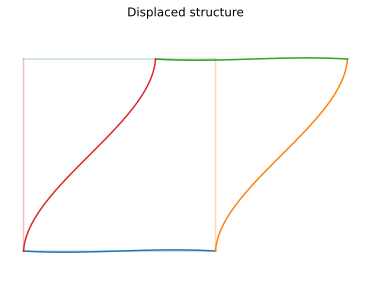

In [13]:
for elem in elems:
    u_elem = con.full_disp(u_free)[elem.global_dofs()]
    elem.plot_displaced(u_elem,num_points=51,global_c=True,scale=150)